<a href="https://colab.research.google.com/github/RaulGLZ04/Actividades-/blob/Actividad-fundamental-5/af5_procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 5: Procesamiento de conjuntos de datos en Python**
**Integrantes:**


*   2132219 Jorge David Tobias Olloqui IMC
*   2132092 David Alejandro Herrera Herrera IMC
*   2109374 Gabriel Emiliano Cuétero Meza IMC
*   2131987 Luis Raúl González Aguirre IMC
*   2012057 Angel Gabriel Jasso Barcena IMC



# **Instrucciones.-**
## **Ejercicio 1.- Análisis y normalización de datos de sensores en un robot móvil**

Dataset a utilizar: robot_sensors.csv
Este dataset contiene mediciones de un robot móvil:

1. Tiempo (s): Marca de tiempo en segundos

2. Distancia (cm): Sensor de ultrasonido (distancia a un obstáculo)

3. Velocidad (cm/s): Velocidad del robot

4. Temperatura (°C): Temperatura del ambiente

***Implementar en una notebook de colab lo siguiente con este dataset:***

Cargar el dataset con pandas

In [ ]:
# Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargar datos desde un archivo CSV
url = 'https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/refs/heads/main/MachineLearning/Datasets/robot_sensors.csv'
df = pd.read_csv(url)

Mostrar primeras filas del dataset

In [ ]:
print(df.head(11))

    Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0            0       43.708611          9.256646         23.925585
1            1       95.564288         27.095047         23.704682
2            2       75.879455         43.647292         33.593819
3            3       63.879264         36.611244         23.743193
4            4       24.041678         40.328057         24.079246
5            5       24.039507         32.939168         31.390974
6            6       15.227525         34.613828         26.746098
7            7       87.955853         42.459783         31.650658
8            8       64.100351         12.483400         20.980492
9            9       73.726532         24.471248         27.313568
10          10       11.852604         11.060472         20.504204


Limpiar los datos

*  Eliminar filas con valores nulos

In [ ]:
# Obtén información sobre las columnas y el tipo de datos de cada una.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None


In [ ]:
# ¿Cuántas propiedades hay en total en el conjunto de datos? Usa el método shape para obtener la forma de los datos.
print(df.shape)

(1000, 4)


In [ ]:
# Verifica si hay valores nulos (missing values) en alguna columna y cómo manejarlos.
# Puedes usar isnull() y sum() para identificar valores nulos.
print(df.isnull().sum())

Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


In [ ]:
df.dropna(subset=['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)'], inplace=True)

In [ ]:
print(df.isnull().sum())

Tiempo (s)          0
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


Filtrar valores atípicos (por ejemplo, si la velocidad es negativa)

In [ ]:
# Filtra todas las velocidades
Tnegativo = df[df['Tiempo (s)'] < 0]
Dnegativo = df[df['Distancia (cm)'] < 0]
Vnegativo = df[df['Velocidad (cm/s)'] < 0]
print("Valores negativos en Tiempo (s):\n", Tnegativo)
print("\nValores negativos en Distancia (cm):\n", Dnegativo)
print("\nValores negativos en Velocidad (cm/s):\n", Vnegativo)

Valores negativos en Tiempo (s):
 Empty DataFrame
Columns: [Tiempo (s), Distancia (cm), Velocidad (cm/s), Temperatura (°C)]
Index: []

Valores negativos en Distancia (cm):
 Empty DataFrame
Columns: [Tiempo (s), Distancia (cm), Velocidad (cm/s), Temperatura (°C)]
Index: []

Valores negativos en Velocidad (cm/s):
 Empty DataFrame
Columns: [Tiempo (s), Distancia (cm), Velocidad (cm/s), Temperatura (°C)]
Index: []


Normalizar los datos numéricos con Min-Max Scaling

In [ ]:
# Define las columnas numéricas a escalar
numeric_cols = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Escala las columnas usando Min-Max Scaling con NumPy
for col in numeric_cols:
    # Obtén los valores mínimo y máximo de la columna
    col_min = df[col].min()
    col_max = df[col].max()

    # Aplica la fórmula de Min-Max Scaling
    df[col] = (df[col] - col_min) / (col_max - col_min)

In [ ]:
print("\nDatos escalados:\n", df.head(11))


Datos escalados:
     Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0            0        0.371735          0.182609          0.262269
1            1        0.950755          0.540740          0.247509
2            2        0.730954          0.873049          0.908233
3            3        0.596960          0.731791          0.250082
4            4        0.152134          0.806411          0.272535
5            5        0.152110          0.658069          0.761054
6            6        0.053716          0.691690          0.450716
7            7        0.865799          0.849208          0.778404
8            8        0.599429          0.247391          0.065498
9            9        0.706915          0.488064          0.488630
10          10        0.016031          0.218824          0.033676


Visualizar los datos normalizados usando matplotlib (valores vs tiempo)

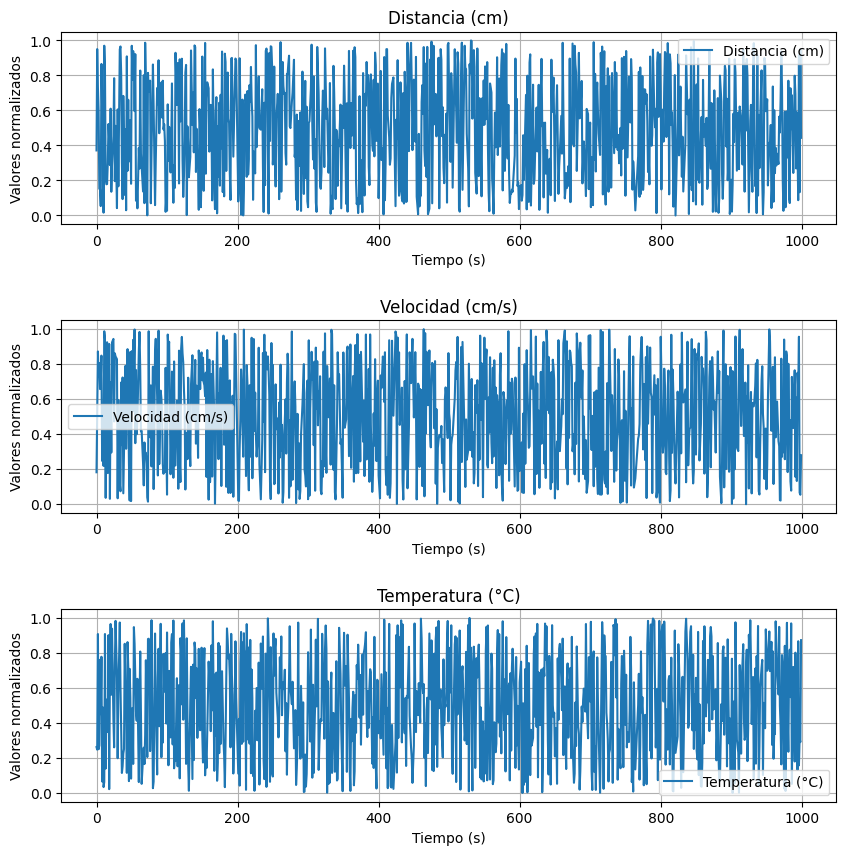

In [ ]:
# Define las columnas a graficar (excluyendo el tiempo)
cols_to_plot = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Crea una figura con 3 subplots (uno para cada columna)
fig, axes = plt.subplots(3, 1, figsize=(10, 10))  # 3 filas, 1 columna

# Itera sobre las columnas y los subplots
for i, col in enumerate(cols_to_plot):
    axes[i].plot(df['Tiempo (s)'], df[col], label=col)
    axes[i].set_xlabel('Tiempo (s)')  # Etiqueta del eje x para cada subplot
    axes[i].set_ylabel('Valores normalizados')  # Etiqueta del eje y para cada subplot
    axes[i].set_title(col)  # Título para cada subplot
    axes[i].legend()
    axes[i].grid(True)

# Ajusta el espaciado entre los subplots
plt.subplots_adjust(hspace=0.5)  # Ajusta el espacio vertical (hspace)

# Muestra el gráfico
plt.show()

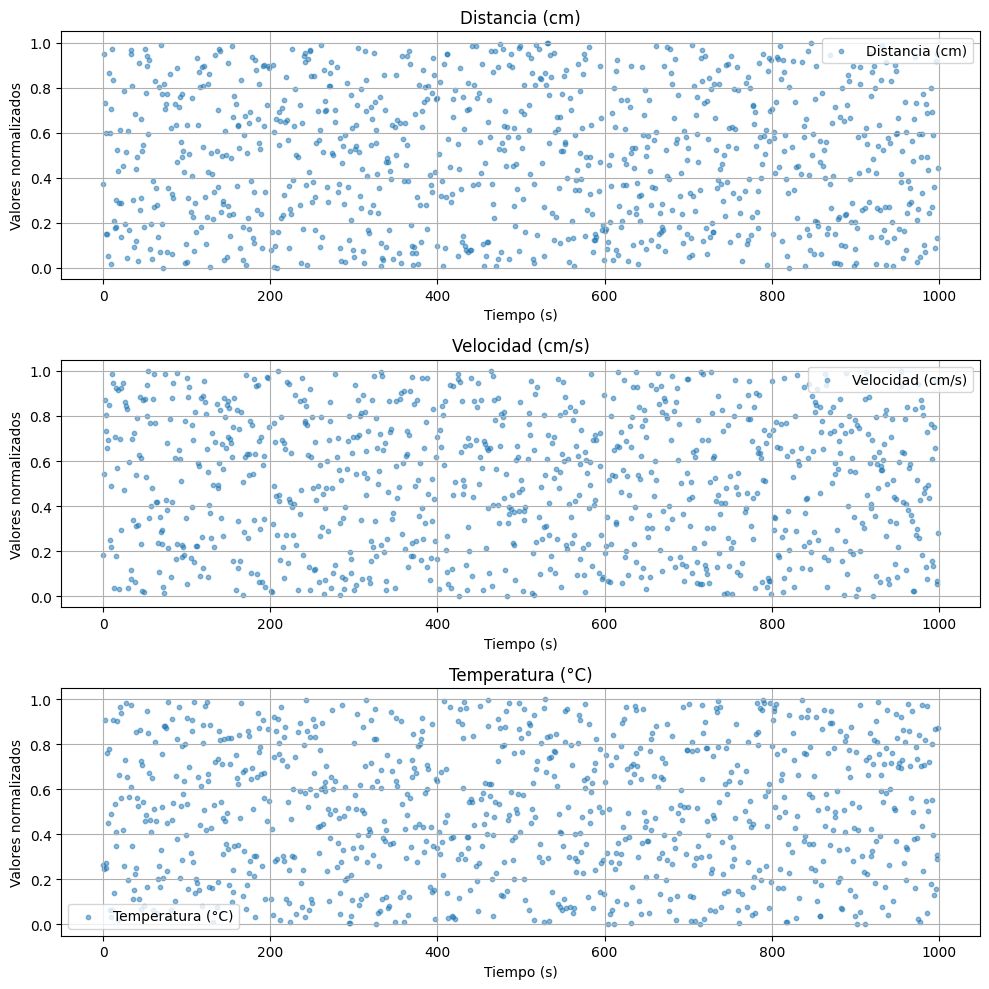

In [ ]:
# Define las columnas a graficar (excluyendo el tiempo)
cols_to_plot = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Crea una figura con 3 subplots (uno para cada columna)
fig, axes = plt.subplots(3, 1, figsize=(10, 10))  # 3 filas, 1 columna

# Itera sobre las columnas y los subplots
for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df['Tiempo (s)'], df[col], label=col, s=10, alpha=0.5)  # scatter plot
    axes[i].set_xlabel('Tiempo (s)')  # Etiqueta del eje x para cada subplot
    axes[i].set_ylabel('Valores normalizados')  # Etiqueta del eje y para cada subplot
    axes[i].set_title(col)  # Título para cada subplot
    axes[i].legend()
    axes[i].grid(True)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la figura con los subplots separados
plt.show()